# Run the n-layer energy balance model

This notebook shows examples of extending the 3-layer energy balance model to general n.

For the two and three layer cases we'll take the MLE estimates from Cummins et al. (2020) for HadGEM2-ES, and we'll use the GISS forcing. Where n > 3 the data is fake.

In [1]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import pooch

from fair.energy_balance_model import EnergyBalanceModel

In [2]:
df_forcing = pd.read_csv('../tests/test_data/RFMIP_ERF_tier2_GISS-E2-1-G.csv')

In [3]:
ebm3 = EnergyBalanceModel(
    ocean_heat_capacity=[3.62, 9.47, 98.66],
    ocean_heat_transfer=[0.54, 2.39, 0.63],
    deep_ocean_efficacy=1.59,
    gamma_autocorrelation=1.73,
    sigma_xi=0.32,
    sigma_eta=0.43,
    forcing_4co2=6.35,
    stochastic_run=True,
    seed=16
)

In [4]:
ebm3.add_forcing(forcing = df_forcing['GISS-E2-1-G TOT'].values, timestep=1)

In [5]:
ebm3.run()

In [6]:
ebm3.temperature

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.03682039e-01,  1.46135778e-02,  3.55482430e-05],
       [ 1.36091052e-01,  3.84963650e-02,  2.06953752e-04],
       [ 1.39549633e-01,  6.00008538e-02,  5.25618257e-04],
       [ 2.23836391e-01,  8.28539717e-02,  9.80248589e-04],
       [ 2.40445582e-01,  1.13744354e-01,  1.61744112e-03],
       [ 1.34967669e-01,  1.15950883e-01,  2.36108519e-03],
       [ 1.25625437e-02,  9.51407114e-02,  3.02718053e-03],
       [ 4.76857137e-02,  7.95133463e-02,  3.54210821e-03],
       [-6.00787520e-02,  5.23290324e-02,  3.95160517e-03],
       [ 2.04885857e-02,  3.86901513e-02,  4.19837070e-03],
       [ 8.88422215e-02,  4.52270638e-02,  4.43350437e-03],
       [-9.44924787e-02,  2.34857482e-02,  4.64184412e-03],
       [-1.60803448e-01, -1.16603058e-02,  4.66283085e-03],
       [-1.91668299e-01, -5.21574744e-02,  4.42858075e-03],
       [-1.33499942e-01, -6.65201983e-02,  4.02003095e-03],
       [-3.01836147e-02, -6.28347963e-02

In [7]:
time = np.arange(1850.5, 2101)

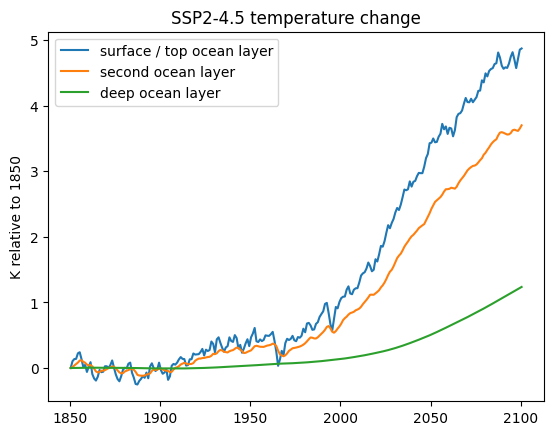

In [8]:
pl.plot(time, ebm3.temperature[:,0], label='surface / top ocean layer')
pl.plot(time, ebm3.temperature[:,1], label='second ocean layer')
pl.plot(time, ebm3.temperature[:,2], label='deep ocean layer')
pl.ylabel('K relative to 1850')
pl.title('SSP2-4.5 temperature change')
pl.legend()

In [9]:
ebm3.emergent_parameters()
ebm3.ecs, ebm3.tcr

(5.879629629629643, 2.4233541248750634)

In [10]:
ebm2 = EnergyBalanceModel(
    ocean_heat_capacity=[7.73, 89.29],
    ocean_heat_transfer=[0.63, 0.52],
    deep_ocean_efficacy=1.52,
    gamma_autocorrelation=1.58,
    sigma_xi=0.64,
    sigma_eta=0.43,
    stochastic_run=True,
    forcing_4co2=6.86,
    seed=16
)

In [11]:
ebm2.add_forcing(forcing = df_forcing['GISS-E2-1-G TOT'].values, timestep=1)

In [12]:
ebm2.emergent_parameters()
ebm2.ecs, ebm2.tcr

(5.444444444444444, 2.4110319989463034)

In [13]:
ebm2.run()

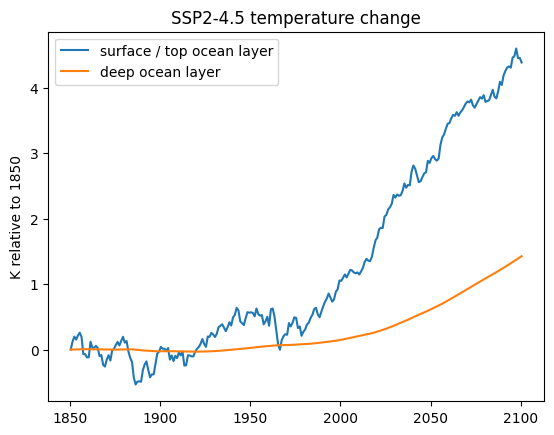

In [14]:
pl.plot(time, ebm2.temperature[:,0], label='surface / top ocean layer')
pl.plot(time, ebm2.temperature[:,1], label='deep ocean layer')
pl.ylabel('K relative to 1850')
pl.title('SSP2-4.5 temperature change')
pl.legend()

In [15]:
# this is not based on a tuning to any existing CMIP6 model, but I try to get the TCR close to the 
# HadGEM2 2- and 3-layer cases.
ebm4 = EnergyBalanceModel(
    ocean_heat_capacity=[1.3, 9, 20, 80],
    ocean_heat_transfer=[0.54, 3, 3, 0.63],
    deep_ocean_efficacy=1.2,
    gamma_autocorrelation=1.73,
    sigma_xi=0.32,
    sigma_eta=0.43,
    forcing_4co2=6.35,
    stochastic_run=True,
    seed=16
)

In [16]:
ebm4.emergent_parameters()
ebm4.ecs, ebm4.tcr

(5.8796296296296084, 2.4474240253355455)

In [17]:
ebm4.add_forcing(forcing = df_forcing['GISS-E2-1-G TOT'].values, timestep=1)

In [18]:
ebm4.run()

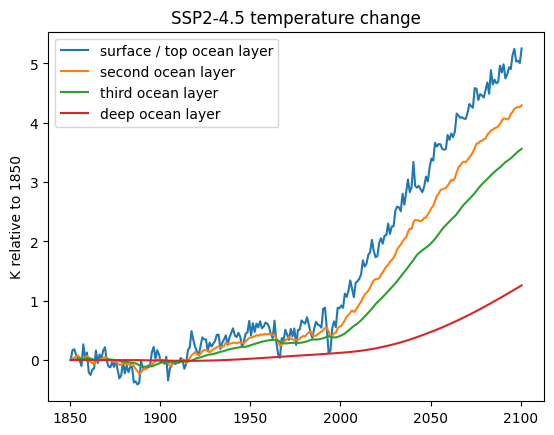

In [19]:
pl.plot(time, ebm4.temperature[:,0], label='surface / top ocean layer')
pl.plot(time, ebm4.temperature[:,1], label='second ocean layer')
pl.plot(time, ebm4.temperature[:,2], label='third ocean layer')
pl.plot(time, ebm4.temperature[:,3], label='deep ocean layer')
pl.ylabel('K relative to 1850')
pl.title('SSP2-4.5 temperature change')
pl.legend()

In [20]:
# let's go totally crazy
ebm10 = EnergyBalanceModel(
    ocean_heat_capacity=[0.6, 1.3, 2, 5, 7, 10, 45, 70, 80, 130],
    ocean_heat_transfer=[0.54, 4, 5, 5, 5, 5, 5, 5, 5, 0.63],
    deep_ocean_efficacy=1.2,
    gamma_autocorrelation=1.73,
    sigma_xi=0.32,
    sigma_eta=0.43,
    forcing_4co2=6.35,
    stochastic_run=True,
    seed=16
)

In [21]:
ebm10.emergent_parameters()
ebm10.ecs, ebm10.tcr

(5.879629629629649, 2.432709040842237)

In [22]:
ebm10.add_forcing(forcing = df_forcing['GISS-E2-1-G TOT'].values, timestep=1)

In [23]:
ebm10.run()

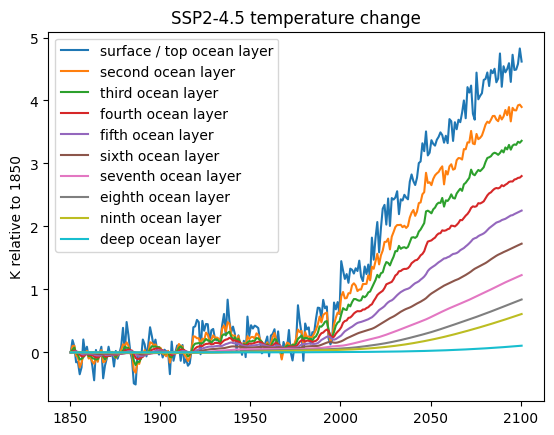

In [24]:
pl.plot(time, ebm10.temperature[:,0], label='surface / top ocean layer')
pl.plot(time, ebm10.temperature[:,1], label='second ocean layer')
pl.plot(time, ebm10.temperature[:,2], label='third ocean layer')
pl.plot(time, ebm10.temperature[:,3], label='fourth ocean layer')
pl.plot(time, ebm10.temperature[:,4], label='fifth ocean layer')
pl.plot(time, ebm10.temperature[:,5], label='sixth ocean layer')
pl.plot(time, ebm10.temperature[:,6], label='seventh ocean layer')
pl.plot(time, ebm10.temperature[:,7], label='eighth ocean layer')
pl.plot(time, ebm10.temperature[:,8], label='ninth ocean layer')
pl.plot(time, ebm10.temperature[:,9], label='deep ocean layer')
pl.ylabel('K relative to 1850')
pl.title('SSP2-4.5 temperature change')
pl.legend()

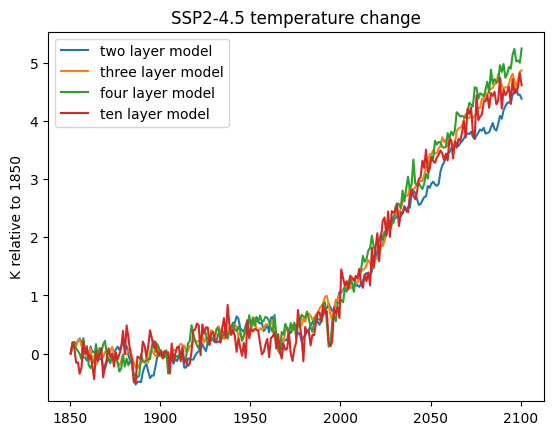

In [25]:
pl.plot(time, ebm2.temperature[:,0], label='two layer model')
pl.plot(time, ebm3.temperature[:,0], label='three layer model')
pl.plot(time, ebm4.temperature[:,0], label='four layer model')
pl.plot(time, ebm10.temperature[:,0], label='ten layer model')
pl.ylabel('K relative to 1850')
pl.title('SSP2-4.5 temperature change')
pl.legend()

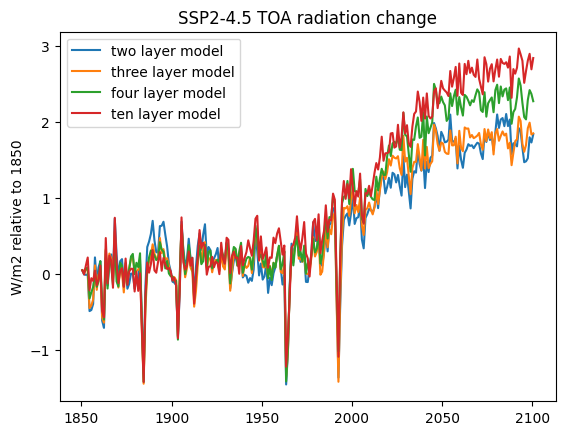

In [26]:
pl.plot(time, ebm2.toa_imbalance, label='two layer model')
pl.plot(time, ebm3.toa_imbalance, label='three layer model')
pl.plot(time, ebm4.toa_imbalance, label='four layer model')
pl.plot(time, ebm10.toa_imbalance, label='ten layer model')
pl.ylabel('W/m2 relative to 1850')
pl.title('SSP2-4.5 TOA radiation change')
pl.legend()

## Repeat everything with stochastic forcing switched off

In [27]:
ebm3 = EnergyBalanceModel(
    ocean_heat_capacity=[3.62, 9.47, 98.66],
    ocean_heat_transfer=[0.54, 2.39, 0.63],
    deep_ocean_efficacy=1.59,
    gamma_autocorrelation=1.73,
    sigma_xi=0.32,
    sigma_eta=0.43,
    forcing_4co2=6.35,
    stochastic_run=False,
    seed=16
)

In [28]:
ebm3.add_forcing(forcing = df_forcing['GISS-E2-1-G TOT'].values, timestep=1)

In [29]:
ebm3.run()

In [30]:
ebm3.temperature

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.65078765e-03,  5.22460078e-04,  9.52981768e-07],
       [ 1.78140679e-02,  2.85472460e-03,  1.04633903e-05],
       [ 3.62788330e-02,  7.76920766e-03,  4.26179620e-05],
       [ 4.86040116e-02,  1.46910520e-02,  1.13558159e-04],
       [ 8.36570960e-03,  1.70540125e-02,  2.20167843e-04],
       [-3.41678882e-02,  8.52533052e-03,  3.04153061e-04],
       [-5.72456463e-02, -4.10207374e-03,  3.16886448e-04],
       [-3.06303877e-02, -1.28947581e-02,  2.55105552e-04],
       [-2.91670434e-02, -1.44122011e-02,  1.66420974e-04],
       [-3.10386676e-02, -1.67837417e-02,  6.57567008e-05],
       [-1.75247991e-02, -1.69653594e-02, -4.40055321e-05],
       [-6.71781976e-02, -1.98207196e-02, -1.54089644e-04],
       [-1.49962315e-01, -3.73890572e-02, -3.27302985e-04],
       [-1.14392505e-01, -5.64365707e-02, -6.33274381e-04],
       [-8.18908635e-02, -5.89850569e-02, -1.00106856e-03],
       [-4.91736297e-02, -5.54927051e-02

In [31]:
time = np.arange(1850.5, 2101)

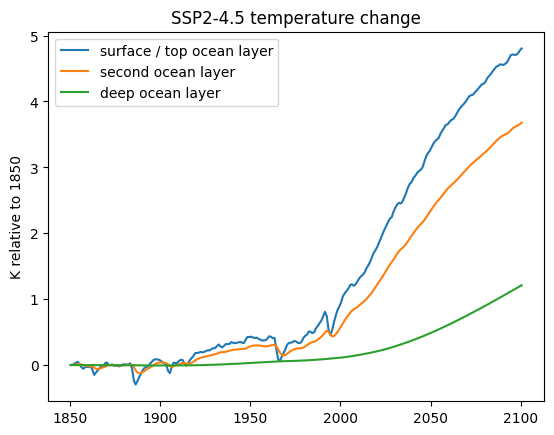

In [32]:
pl.plot(time, ebm3.temperature[:,0], label='surface / top ocean layer')
pl.plot(time, ebm3.temperature[:,1], label='second ocean layer')
pl.plot(time, ebm3.temperature[:,2], label='deep ocean layer')
pl.ylabel('K relative to 1850')
pl.title('SSP2-4.5 temperature change')
pl.legend()

In [33]:
ebm3.emergent_parameters()
ebm3.ecs, ebm3.tcr

(5.879629629629643, 2.4233541248750634)

In [34]:
ebm2 = EnergyBalanceModel(
    ocean_heat_capacity=[7.73, 89.29],
    ocean_heat_transfer=[0.63, 0.52],
    deep_ocean_efficacy=1.52,
    gamma_autocorrelation=1.58,
    sigma_xi=0.64,
    sigma_eta=0.43,
    stochastic_run=False,
    forcing_4co2=6.86,
    seed=16
)

In [35]:
ebm2.add_forcing(forcing = df_forcing['GISS-E2-1-G TOT'].values, timestep=1)

In [36]:
ebm2.emergent_parameters()
ebm2.ecs, ebm2.tcr

(5.444444444444444, 2.4110319989463034)

In [37]:
ebm2.run()

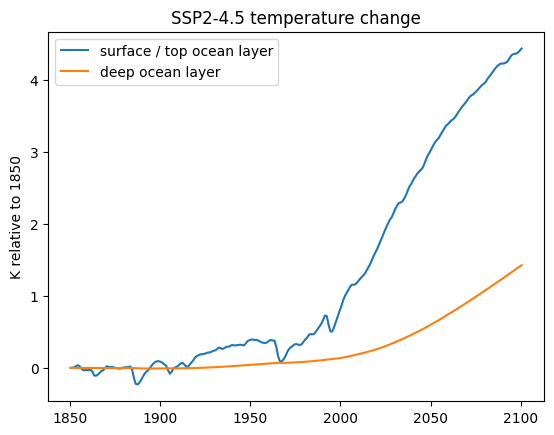

In [38]:
pl.plot(time, ebm2.temperature[:,0], label='surface / top ocean layer')
pl.plot(time, ebm2.temperature[:,1], label='deep ocean layer')
pl.ylabel('K relative to 1850')
pl.title('SSP2-4.5 temperature change')
pl.legend()

In [39]:
# this is not based on a tuning to any existing CMIP6 model, but I try to get the TCR close to the 
# HadGEM2 2- and 3-layer cases.
ebm4 = EnergyBalanceModel(
    ocean_heat_capacity=[1.3, 9, 20, 80],
    ocean_heat_transfer=[0.54, 3, 3, 0.63],
    deep_ocean_efficacy=1.2,
    gamma_autocorrelation=1.73,
    sigma_xi=0.32,
    sigma_eta=0.43,
    forcing_4co2=6.35,
    stochastic_run=False,
    seed=16
)

In [40]:
ebm4.emergent_parameters()
ebm4.ecs, ebm4.tcr

(5.8796296296296084, 2.4474240253355455)

In [41]:
ebm4.add_forcing(forcing = df_forcing['GISS-E2-1-G TOT'].values, timestep=1)

In [42]:
ebm4.run()

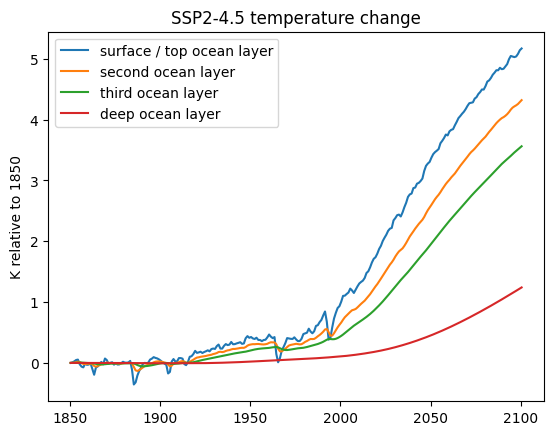

In [43]:
pl.plot(time, ebm4.temperature[:,0], label='surface / top ocean layer')
pl.plot(time, ebm4.temperature[:,1], label='second ocean layer')
pl.plot(time, ebm4.temperature[:,2], label='third ocean layer')
pl.plot(time, ebm4.temperature[:,3], label='deep ocean layer')
pl.ylabel('K relative to 1850')
pl.title('SSP2-4.5 temperature change')
pl.legend()

In [44]:
# let's go totally crazy
ebm10 = EnergyBalanceModel(
    ocean_heat_capacity=[0.6, 1.3, 2, 5, 7, 10, 45, 70, 80, 130],
    ocean_heat_transfer=[0.54, 4, 5, 5, 5, 5, 5, 5, 5, 0.63],
    deep_ocean_efficacy=1.2,
    gamma_autocorrelation=1.73,
    sigma_xi=0.32,
    sigma_eta=0.43,
    forcing_4co2=6.35,
    stochastic_run=False,
    seed=16
)

In [45]:
ebm10.emergent_parameters()
ebm10.ecs, ebm10.tcr

(5.879629629629649, 2.432709040842237)

In [46]:
ebm10.add_forcing(forcing = df_forcing['GISS-E2-1-G TOT'].values, timestep=1)

In [47]:
ebm10.run()

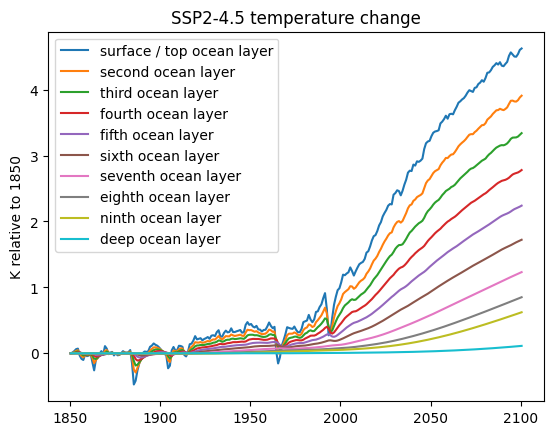

In [48]:
pl.plot(time, ebm10.temperature[:,0], label='surface / top ocean layer')
pl.plot(time, ebm10.temperature[:,1], label='second ocean layer')
pl.plot(time, ebm10.temperature[:,2], label='third ocean layer')
pl.plot(time, ebm10.temperature[:,3], label='fourth ocean layer')
pl.plot(time, ebm10.temperature[:,4], label='fifth ocean layer')
pl.plot(time, ebm10.temperature[:,5], label='sixth ocean layer')
pl.plot(time, ebm10.temperature[:,6], label='seventh ocean layer')
pl.plot(time, ebm10.temperature[:,7], label='eighth ocean layer')
pl.plot(time, ebm10.temperature[:,8], label='ninth ocean layer')
pl.plot(time, ebm10.temperature[:,9], label='deep ocean layer')
pl.ylabel('K relative to 1850')
pl.title('SSP2-4.5 temperature change')
pl.legend()

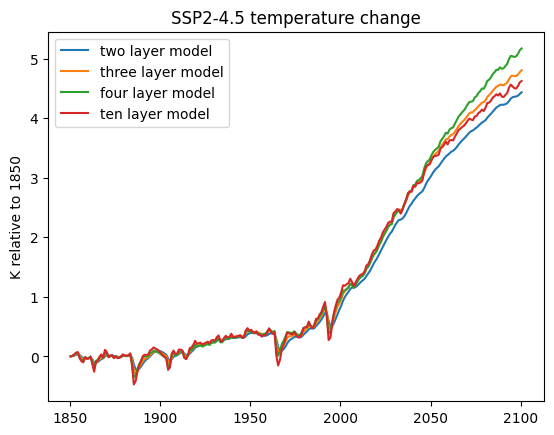

In [49]:
pl.plot(time, ebm2.temperature[:,0], label='two layer model')
pl.plot(time, ebm3.temperature[:,0], label='three layer model')
pl.plot(time, ebm4.temperature[:,0], label='four layer model')
pl.plot(time, ebm10.temperature[:,0], label='ten layer model')
pl.ylabel('K relative to 1850')
pl.title('SSP2-4.5 temperature change')
pl.legend()

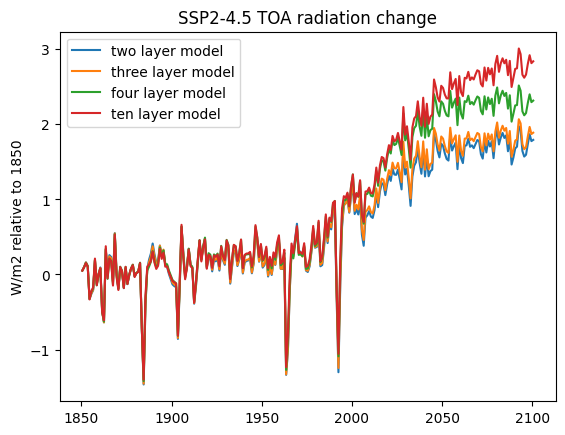

In [50]:
pl.plot(time, ebm2.toa_imbalance, label='two layer model')
pl.plot(time, ebm3.toa_imbalance, label='three layer model')
pl.plot(time, ebm4.toa_imbalance, label='four layer model')
pl.plot(time, ebm10.toa_imbalance, label='ten layer model')
pl.ylabel('W/m2 relative to 1850')
pl.title('SSP2-4.5 TOA radiation change')
pl.legend()